<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/Knapsack_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema


El problema de la mochila es bien conocido, este hace referencia a un problema de optimizacion donde queremos en un espacio delimitado encontrar la forma mas optima entre una X cantidad de piezas que nos permita sacar el mayor beneficio posible.

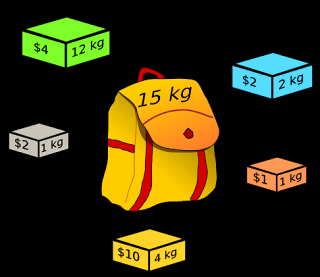

Un ejemplo de esto, algo usual seria la forma de tener y maximixar el valor de items en los videojuegos con espacio limitado en la mochila, generalmente los videojuegos de recursos aplican esta idea tanto de forma manual como de forma automatica.

Otra aplicacion de este algoritmo es su uso en la criptografia.

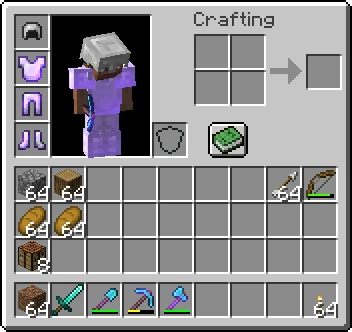

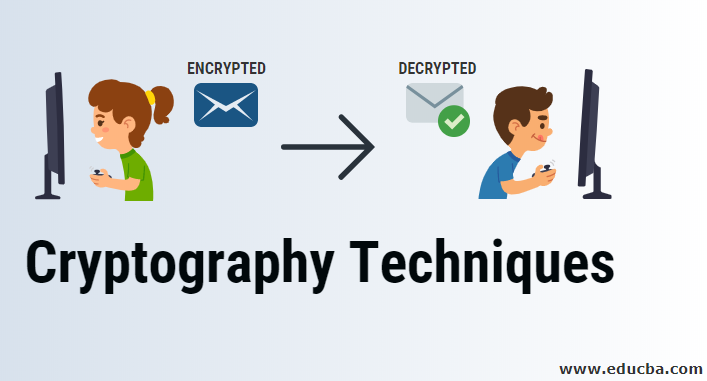

En el caso especifico nosotros aplicamos la version del problema de la mochila que ve la exitencia de un objeto dentro de esta, ademas de retornar el valor maximo de esta. Este es conocido como 0-1 Knapsack Problem o Subset-sum problem.

# 1.1) Descripcion del algoritmo

En este problema entra el peso de cada objeto, el valor de cada objeto, el peso de la mochila, la cantidad de objetos o el largo del arreglo del valor de estos.

Para ello generamos una matriz en la cual genera subproblemas estos inicializados en 0, si el peso de la mochila es mayor al peso del objeto sumamos calculamos y asignamos el valor correspondiente a ese peso y rellenamos la fila con ese valor.

Luego pasamos a la siguiente fila sumamos los pesos y tomamos desde el ultimo peso y asi vamos comparando y sumando hasta llegar al ultimo objeto. Para terminar va retornando en caso de haber realizado una suma la existencia del objeto junto a su peso y valor.


# 2) Codigo

recursivo

In [1]:
def knapSack(W, wt, val, n):

    if n == 0 or W == 0:
        return 0

    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)

    else:
        return max(
            val[n-1] + knapSack(
                W-wt[n-1], wt, val, n-1),
            knapSack(W, wt, val, n-1))
 

bottom up

In [20]:
def knapSack(W, wt, val, n, verbose = False):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
 
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1]
                          + K[i-1][w-wt[i-1]], 
                              K[i-1][w])
                
                if verbose:
                  print("La mochila guarda", W, "kg, guarda ", i - 1, " y su valor maximo sera ", K[i-1[W]])
                  print("El item ", i, ", pesa ", wt[i-1], " kg, y vale $", val[i-1], ": " )
                  print("$", wt[i-1] + K[i-1][w-wt[i-1]], " = $", val[i-1], " + $", K[i-1][W - wt[i-1]])
                  print("El valor max de la mochila es: ", K[i][W])
                  print("")

            else:
                K[i][w] = K[i-1][w]

                if verbose:
                    print("La mochila guarda ", wt,"kg, guarda {i-1} y su valor máximo es ${a[i-1][j]}")
                    print("El objeto de valor $", val[i-1]," y peso ", wt[i-1], "kg no se puede agregar")
                    print("El valor máximo se mantendra igual")
                    print("")

    global cont
    cont = (n)
    cont *= (W + 1)                    
 
    return K[n][W]


In [21]:
cont = 0
val = [2, 1 , 7 , 10]
wt = [5, 1, 4 , 8 ] 
W = 10
n = len(val)
print("Maximo valor: ",knapSack(W, wt, val, n, verbose = False))
print("Subproblemas resueltos: ", cont)

Maximo valor:  11
Subproblemas resueltos:  44


Gready

In [50]:
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def fractionalKnapsack(W, arr, verbose = False):
    contador = 0
    arr.sort(key=lambda x: (x.value/x.weight), reverse=True)   

    finalvalue = 0.0
    

    for item in arr:
        if item.weight <= W:
            W -= item.weight
            finalvalue += item.value
            contador += 1
        else:
            finalvalue += item.value * W / item.weight
            break

    return finalvalue, contador

In [52]:
W = 50
arr = [Item(60, 10), Item(100, 20), Item(120, 30)]
max_val, cont = fractionalKnapsack(W, arr)
print(f'Valor máximo posible: {max_val}')
print(f'Comparaciones: {cont}')

Valor máximo posible: 240.0
Comparaciones: 2


# 3) Correctitud

***Hipotesis de inducción:*** El algoritmo es correcto para todo valor de $a[i, j]$ donde $(i, j ) < (i', j')$. O en otras tablas los elementos son correctos.

***Caso Base:*** $a[i, 0] = a[0, j] = 0$

***Paso de inducción:*** Al calcular $a[i', j']$ por inducción tenemos que $a[i'-1, j']$, $a[ai' - 1, j' - w_{i'}]$ esta calculado correctamente. Entonces el algoritmo considerada el valor optimo para el $i'$ item de la mochila como $a[i' - 1, j'- w_{i'}] + v_i$ y para el item $i'$ no en la mochila como $a[i' -1, j']$. Por lo tanto el valor en $a[i', j']$ es correcto.

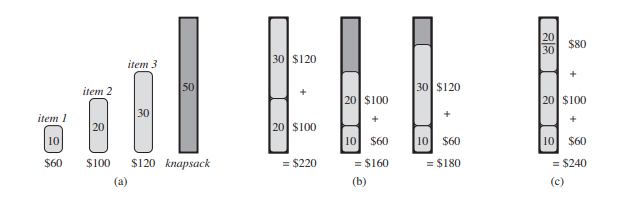

El metodo gready normal no es optimo ademas de no ser correcto para este caso pero al nosotros ocupar el gready de forma fraccionaria este es correcto y cumple el caso (c) de la imagen.

# 4) Tiempo de ejecución

## bottom up:

Para el algoritmo de bottom up tenemos que el tiempo de ejecucion sera de $O(N*W)$

Esto se debe a que tenemos 2 ciclos "for" en el algoritmo de bottom up, uno corresponde al tamaño de este o la cantidad de items a entrar y por otro lado tenemos el segundo ciclo "for" tenemos el tamaño de la mochila y debido a estos 2 ciclos tenemos que el algoritmo tiene un tiempo de ejecución $O(N*W)$



## Gready:

Este algoritmo se compone de 2 partes principales, la primera es un ordenamiento que cual posee un tiempo de ejecución de $O(nlogn)$, la segunda parte tiene un tiempo de ejecución el cual corresponde a $O(n)$ por lo que al calcular la complejidad total tenemos que esta corresponde a $O(nLogㅤn)$.

Hay que mencionar que si los elementos ya estan ordenados este tiene un tiempo de ejecucion de $O(n)$.

# 5) Experimentos

In [54]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(10,100):
    p_max = 70
    p_objetos =  [19, 20, 31, 57]
    v_objetos = [2, 30, 10, 90]
    n = len(v_objetos)
    arr = [Item(60, 10), Item(100, 20), Item(120, 30)]
    cont = 0
    contador = 0

    a = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({p_max}, {p_objetos}, {v_objetos}, {n})", repeat=1, number=10)
    b = repeat(setup="from __main__ import fractionalKnapsack", stmt=f"fractionalKnapsack({p_max}, {arr})", repeat=1, number=10)

    x.append(n)
    y.append(a)
    z.append(b)


plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Bottom_up", "Greedy"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo en ms')
plt.show()

SyntaxError: ignored

In [56]:
import matplotlib.pyplot as plt

x=[]; y=[]; z=[]

for n in range(5,100):

    p_max = 70
    p_objetos =  [19, 20, 31, 57]
    v_objetos = [2, 30, 10, 90]
    arr = [Item(60, 10), Item(100, 20), Item(120, 30)]
    contador = 0
    cont = 0

    valor = knapSack(p_max, p_objetos, v_objetos, n)
    valor = fractionalKnapsack(W, arr)

    x.append(n)
    y.append(cont)
    y1.append(contador)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Sub-Problemas (Bottom-up)", "Iteraciones  (Greedy)"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

IndexError: ignored